Choropleth Mapping of Ethnicity Index

In [4]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx
# Build the choropleth
import plotly.express as px

import base64
from io import BytesIO

from keplergl import KeplerGl

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
ethdf=gpd.read_file("ethnicityindex.geojson")
stadf=gpd.read_file("stations.geojson")

In [12]:
tod=stadf[stadf['TOD']=='Yes']
ntod=stadf[stadf['TOD']=='No']
ethdf_wb = ethdf.to_crs(epsg=3857)
stadf_wb = stadf.to_crs(epsg=3857)
tod_wb = tod.to_crs(epsg=3857)
ntod_wb = ntod.to_crs(epsg=3857)

In [7]:
minx, miny, maxx, maxy = ethdf_wb.geometry.total_bounds

In [8]:
ethdf_wb.columns


Index(['GEOID_2019', 'NAME_2019', 'Total_2019', 'Non Hispanic White_2019',
       'Non Hispanic Black_2019',
       'Non Hispanic American Indian and Alaska Native_2019',
       'Non Hispanic Asian_2019',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
       'Non Hispanic Some other race_2019',
       'Non Hispanic Two or more races_2019', 'Hispanic_2019', 'new_GEOID',
       'Total_2013', 'Non Hispanic White_2013', 'Non Hispanic Black_2013',
       'Non Hispanic American Indian and Alaska Native_2013',
       'Non Hispanic Asian_2013',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
       'Non Hispanic Some other race_2013',
       'Non Hispanic Two or more races_2013', 'Hispanic_2013', 'GEOID_2013',
       'NAME_2013', 'Percent Total_2013', 'Percent Non Hispanic White_2013',
       'Percent Non Hispanic Black_2013',
       'Percent Non Hispanic American Indian and Alaska Native_2013',
       'Percent Non Hispanic Asian_2013',
       'Pe

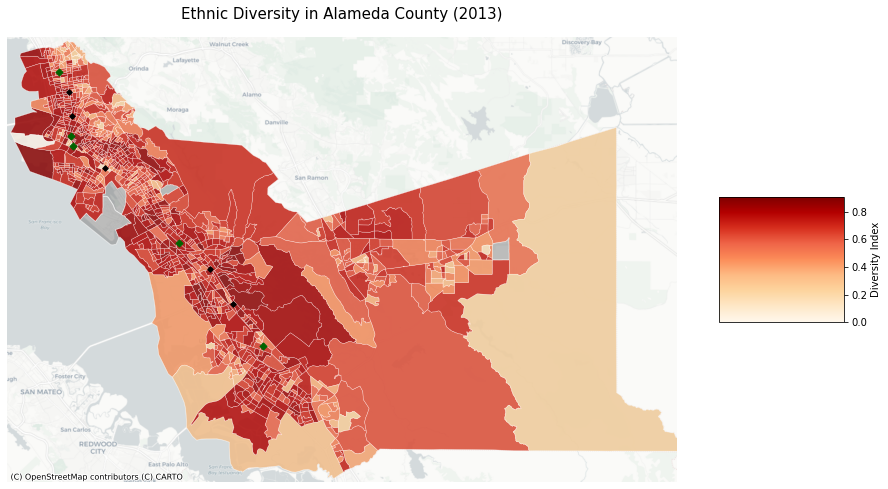

In [10]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethdf_wb.plot(ax=ax,
              column = 'iqv_2013',
              cmap='OrRd', 
              edgecolor='white',
              alpha=0.8,
            #scheme='natural',
           # classification_kwds={'bins':[0.25,0.50,0.75,1]},
              linewidth=0.3,
              legend=True,
              legend_kwds={'label':"Diversity Index",'aspect':'equal'})

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod.Station)

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod.Station)

ax.set_xlim(minx-500, maxx-1000) 
ax.set_ylim(miny-500, maxy+500)
ax.axis('off')
ax.set_title("Ethnic Diversity in Alameda County (2013)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

fig.savefig("htmls/ethnic_choropleth_2013.png", dpi=100, bbox_inches='tight')
plt.show()

In [9]:
fig.savefig("htmls/ethnic_choropleth_2013.png", dpi=100, bbox_inches='tight')
plt.show()

In [6]:
#!pip install ipywidgets
#!pip install keplergl
!jupyter nbextension install --py --sys-prefix keplergl

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
Installing /opt/conda/lib/python3.9/site-packages/keplergl/static -> keplergl-jupyter
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/keplergl.html
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/main.js
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/extension.js
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/extension.js.map
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/index.js
Up to date: /opt/conda/share/jupyter/nbextensions/keplergl-jupyter/index.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable keplergl --py --sy

In [7]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnic_choropleth_2013.html','w') as f:
    f.write(html)

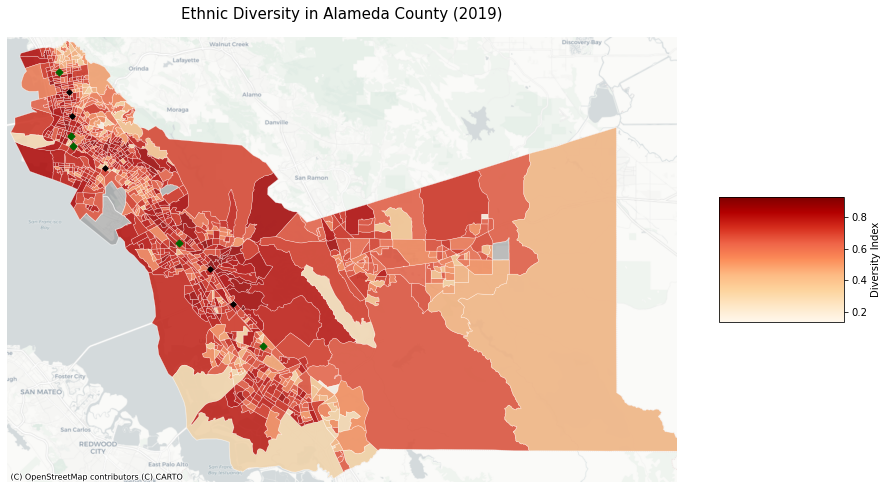

In [11]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethdf_wb.plot(ax=ax,
              column = 'iqv_2019',
              cmap='OrRd', 
              edgecolor='white',
              alpha=0.8,
              linewidth=0.3,
              legend=True,
              legend_kwds={'label':"Diversity Index",'aspect':'equal'})

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod['Station'])

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod['Station'])

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Ethnic Diversity in Alameda County (2019)",fontsize=15,pad=18)

# add a basemap

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

fig.savefig("htmls/ethnic_choropleth_2019.png", dpi=100, bbox_inches='tight')
plt.show()

In [9]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnic_choropleth_2019.html','w') as f:
    f.write(html)

In [10]:
fig.savefig("htmls/ethnic_choropleth_2019.png", dpi=100, bbox_inches='tight')
plt.show()

In [14]:
ethchange_wb=ethdf_wb[['GEOID_2019' ,'NAME_2019','iqv_2019','iqv_2013','geometry']]

In [15]:
ethchange_wb['index_change']=((ethchange_wb['iqv_2019']-ethchange_wb['iqv_2013'])/ethchange_wb['iqv_2013'])*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [16]:
ethchange_wb.sample(10)

,GEOID_2019,NAME_2019,iqv_2019,iqv_2013,geometry,index_change
447,15000US060014251032,"Block Group 2, Alameda, CA",0.767757,0.760400,"MULTIPOLYGON (((-13613518.122 4558149.472, -13...",0.967489
815,15000US060014415213,"Block Group 3, Alameda, CA",0.598219,0.529427,"MULTIPOLYGON (((-13587953.490 4519047.387, -13...",12.993751
997,15000US060014511014,"Block Group 4, Alameda, CA",NaN,NaN,"MULTIPOLYGON (((-13549672.610 4534297.976, -13...",NaN
480,15000US060014278001,"Block Group 1, Alameda, CA",0.711622,0.857146,"MULTIPOLYGON (((-13610589.307 4546915.857, -13...",-16.977720
239,15000US060014077004,"Block Group 4, Alameda, CA",0.764310,0.725820,"MULTIPOLYGON (((-13602744.177 4548151.107, -13...",5.302971
664,15000US060014358004,"Block Group 4, Alameda, CA",0.768203,0.789720,"MULTIPOLYGON (((-13596419.671 4534991.286, -13...",-2.724623
97,15000US060014041012,"Block Group 2, Alameda, CA",0.757089,0.583697,"MULTIPOLYGON (((-13609498.264 4555224.467, -13...",29.705875
694,15000US060014366022,"Block Group 2, Alameda, CA",0.815331,0.808990,"MULTIPOLYGON (((-13590769.205 4530933.779, -13...",0.783817
919,15000US060014443011,"Block Group 1, Alameda, CA",0.800207,0.781939,"MULTIPOLYGON (((-13587259.524 4514935.975, -13...",2.336322
347,15000US060014206003,"Block Group 3, Alameda, CA",0.757653,0.711567,"MULTIPOLYGON (((-13613673.970 4563976.562, -13...",6.476632


In [15]:
ethchange_wb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOID_left    7433 non-null   object  
 1   NAME_left     7433 non-null   object  
 2   iqv_2019_sq   7389 non-null   float64 
 3   iqv_2013_sq   7405 non-null   float64 
 4   geometry      7433 non-null   geometry
 5   index_change  7368 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 348.5+ KB


In [17]:
ethchange_wb=ethchange_wb.dropna()

In [17]:
ethchange_wb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7368 entries, 0 to 7432
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOID_left    7368 non-null   object  
 1   NAME_left     7368 non-null   object  
 2   iqv_2019_sq   7368 non-null   float64 
 3   iqv_2013_sq   7368 non-null   float64 
 4   geometry      7368 non-null   geometry
 5   index_change  7368 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 402.9+ KB


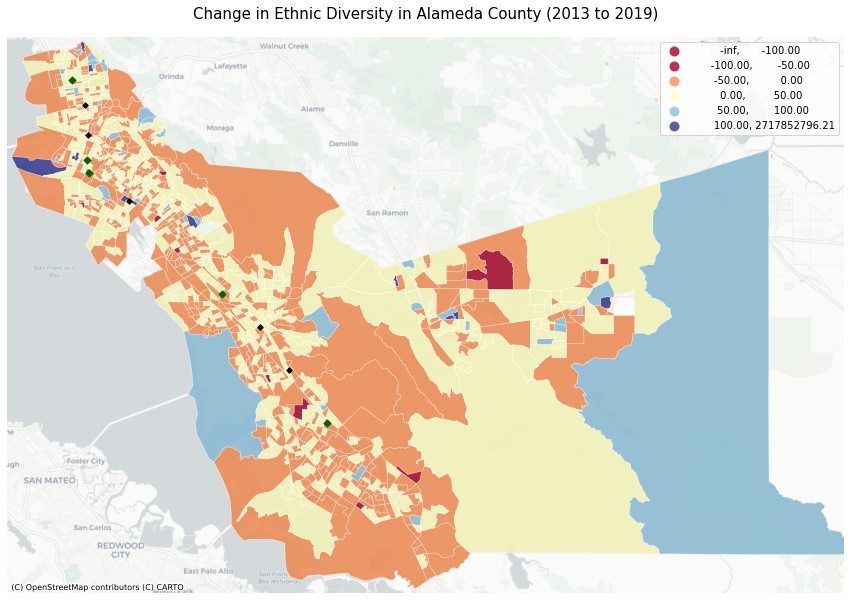

In [35]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethchange_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethchange_wb.plot(ax=ax,
                  column = ethchange_wb['index_change'],
                  cmap='RdYlBu',  
                  edgecolor='white',
                  alpha=0.8,
                  linewidth=0.3,
                  scheme='user_defined',
                  classification_kwds={'bins':[-100,-50,0,50,100]},
                  legend=True,
              #legend_kwds={'label':"Diversity Index"}
                 )

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod['Station'])

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod['Station'])

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [90]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnicchange_choropleth.html','w') as f:
    f.write(html)

In [32]:
ethchange_wb.columns

Index(['GEOID_2019', 'NAME_2019', 'iqv_2019', 'iqv_2013', 'geometry',
       'index_change'],
      dtype='object')

In [19]:
fig.savefig("htmls/ethnicchange_choropleth.png", dpi=100, bbox_inches='tight')
plt.show()

In [11]:
ethchange_wb.info()

NameError: name 'ethchange_wb' is not defined

In [18]:
ethchange_wbw=ethchange_wb[ethchange_wb['index_change']<2000].sort_values(by='index_change')
ethchange_wbw

,GEOID_2019,NAME_2019,iqv_2019,iqv_2013,geometry,index_change
742,15000US060014382011,"Block Group 1, Alameda, CA",0.272827,0.818211,"MULTIPOLYGON (((-13590110.750 4527295.865, -13...",-66.655648
1005,15000US060014512022,"Block Group 2, Alameda, CA",0.172353,0.515925,"MULTIPOLYGON (((-13551204.366 4540248.239, -13...",-66.593466
856,15000US060014420002,"Block Group 2, Alameda, CA",0.132691,0.377477,"MULTIPOLYGON (((-13574946.698 4516609.749, -13...",-64.847973
762,15000US060014403013,"Block Group 3, Alameda, CA",0.312920,0.676854,"MULTIPOLYGON (((-13586932.468 4522665.569, -13...",-53.768399
295,15000US060014093004,"Block Group 4, Alameda, CA",0.382523,0.809077,"MULTIPOLYGON (((-13600714.266 4541921.007, -13...",-52.721039
...,...,...,...,...,...,...
1026,15000US060014515052,"Block Group 2, Alameda, CA",0.413165,0.151331,"MULTIPOLYGON (((-13551179.653 4535421.305, -13...",173.020377
177,15000US060014062021,"Block Group 1, Alameda, CA",0.668146,0.244419,"MULTIPOLYGON (((-13606574.124 4548731.954, -13...",173.360763
365,15000US060014216003,"Block Group 3, Alameda, CA",0.498397,0.165368,"MULTIPOLYGON (((-13610656.655 4563338.867, -13...",201.387100
169,15000US060014061001,"Block Group 1, Alameda, CA",0.376087,0.123096,"MULTIPOLYGON (((-13606963.408 4547686.339, -13...",205.523486


In [37]:
#ethchange_wb['iqv_2013']=ethchange_wb['iqv_2013'].replace(0,0.00000001)
#ethchange_wb['iqv_2019']=ethchange_wb['iqv_2019'].replace(0,0.00000001)
ethchange_wb.sort_values(by='iqv_2013').dropna().to_csv('ethchange_wb.csv')
ethchange_w=ethchange_wb[['GEOID_2019', 'NAME_2019', 'iqv_2019', 'iqv_2013',
       'index_change']]
ethchange_w.sort_values(by='index_change')


,GEOID_2019,NAME_2019,iqv_2019,iqv_2013,index_change
742,15000US060014382011,"Block Group 1, Alameda, CA",0.272827,8.182111e-01,-6.665565e+01
1005,15000US060014512022,"Block Group 2, Alameda, CA",0.172353,5.159254e-01,-6.659347e+01
856,15000US060014420002,"Block Group 2, Alameda, CA",0.132691,3.774772e-01,-6.484797e+01
762,15000US060014403013,"Block Group 3, Alameda, CA",0.312920,6.768541e-01,-5.376840e+01
295,15000US060014093004,"Block Group 4, Alameda, CA",0.382523,8.090766e-01,-5.272104e+01
...,...,...,...,...,...
177,15000US060014062021,"Block Group 1, Alameda, CA",0.668146,2.444190e-01,1.733608e+02
365,15000US060014216003,"Block Group 3, Alameda, CA",0.498397,1.653679e-01,2.013871e+02
169,15000US060014061001,"Block Group 1, Alameda, CA",0.376087,1.230960e-01,2.055235e+02
70,15000US060014033002,"Block Group 2, Alameda, CA",0.613111,1.263767e-01,3.851454e+02


In [21]:
config={'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['Change in Ethnicity Index 2013-2019'],
     'id': '7tr3tm42e',
     'name': [],
     'type': None,
     'value': None,
     'enlarged': False,
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'speed': 1}],
   'layers': [{'id': 'fdflug5',
     'type': 'point',
     'config': {'dataId': 'BART Stations',
      'label': 'BART Stations',
      'color': [47, 197, 204],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 28.4,
       'fixedRadius': False,
       'opacity': 0.72,
       'outline': True,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Uber Viz Diverging 0',
        'type': 'diverging',
        'category': 'Uber',
        'colors': ['#00939C', '#FEEEE8', '#C22E00']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': []},
     'visualChannels': {'colorField': {'name': 'TOD', 'type': 'boolean'},
      'colorScale': 'ordinal',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': '3k70il8',
     'type': 'geojson',
     'config': {'dataId': 'Change in Ethnicity Index 2013-2019',
      'label': '2019 Ethincity Index',
      'color': [221, 178, 124],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': 'geometry'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [136, 87, 44],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 25,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': True,
       'enable3d': True,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'iqv_2019', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': {'name': 'index_change', 'type': 'real'},
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': 'r7cm58r',
     'type': 'geojson',
     'config': {'dataId': 'Change in Ethnicity Index 2013-2019',
      'label': '2013 Ethincity Index',
      'color': [221, 178, 124],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': 'geometry'},
      'isVisible': False,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [136, 87, 44],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 24.6,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': True,
       'enable3d': True,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'iqv_2013', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': {'name': 'index_change', 'type': 'real'},
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Change in Ethnicity Index 2013-2019': [{'name': 'GEOID_2019',
        'format': None},
       {'name': 'NAME_2019', 'format': None},
       {'name': 'iqv_2019', 'format': None},
       {'name': 'iqv_2013', 'format': None},
       {'name': 'index_change', 'format': None}],
      'BART Stations': [{'name': 'Station', 'format': None},
       {'name': 'City', 'format': None},
       {'name': 'Code', 'format': None},
       {'name': 'TOD', 'format': None},
       {'name': 'County', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': -4.789812170038023,
   'dragRotate': True,
   'latitude': 37.74831875994978,
   'longitude': -122.10890941038897,
   'pitch': 23.55116162173792,
   'zoom': 10.244484513176058,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

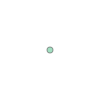

In [24]:
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]
stat_gdf['geometry'][0]

In [25]:

#Create a basemap 
map = KeplerGl(height=600, width=800)#show the map
map.add_data(data=ethchange_wbw, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')

#map.save_to_html(file_name='test_kepler_2013.html',read_only=True)

#map.save_to_html(file_name='test_kepler.html',read_only=True)
map




User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Change in Ethnicity Index 2013-2019': {'index': [742, 1005, 856, 762, 295, 888, 205, 992, 482,…

In [108]:
#map.save_to_html(file_name='test_kepler_2019.html',read_only=True)
config=map.config